In [15]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
df= pd.read_csv('/content/Kaggle_Training_Dataset_v2.csv')

<ipython-input-3-f284c24ce12a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/Kaggle_Training_Dataset_v2.csv')


In [6]:
df.shape # there are lot of rows with data (Can be duplicate values and NA values might present)

(1687861, 23)

In [5]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [8]:
df.info() # Gives an idea of the No of categorical data and no of No of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [9]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [10]:
df.nunique()

sku                  1687861
national_inv           14969
lead_time                 32
in_transit_qty          5230
forecast_3_month        7825
forecast_6_month       11114
forecast_9_month       13662
sales_1_month           5764
sales_3_month          10495
sales_6_month          14818
sales_9_month          18341
min_bank                5568
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             654
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [11]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [12]:
df=df.drop(['sku'],axis=1)

In [13]:
df['went_on_backorder'].value_counts() # shows the data is imbalance

went_on_backorder
No     1676567
Yes      11293
Name: count, dtype: int64

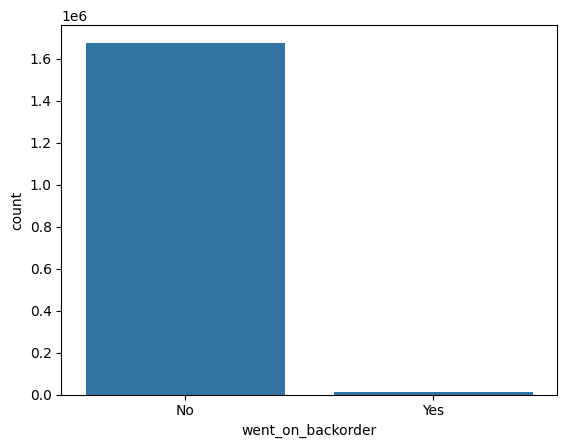

In [16]:
sns.countplot(x='went_on_backorder', data=df)
plt.show()

In [17]:
df1= df.dropna(axis=0) # dropping rows with NA values

In [18]:
df.shape ,df1.shape #  as we can see here there are relatively less values of na than actual data frame

((1687861, 22), (1586967, 22))

In [19]:
df2= df1.drop_duplicates() # dropping duplicates
df2.shape

(979471, 22)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586967 entries, 1 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1586967 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1586967 non-null  float64
 3   forecast_3_month   1586967 non-null  float64
 4   forecast_6_month   1586967 non-null  float64
 5   forecast_9_month   1586967 non-null  float64
 6   sales_1_month      1586967 non-null  float64
 7   sales_3_month      1586967 non-null  float64
 8   sales_6_month      1586967 non-null  float64
 9   sales_9_month      1586967 non-null  float64
 10  min_bank           1586967 non-null  float64
 11  potential_issue    1586967 non-null  object 
 12  pieces_past_due    1586967 non-null  float64
 13  perf_6_month_avg   1586967 non-null  float64
 14  perf_12_month_avg  1586967 non-null  float64
 15  local_bo_qty       1586967 non-null  

Going Through Categorical and Numerical Data

In [24]:
numerical_cols= df1.select_dtypes(include=['number']).columns
categorical_cols= df1.select_dtypes(include=['object']).columns

In [25]:
categorical_cols= ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'] # Dealing an output Categorical Column with Label Encoder (Excluded)

In [26]:
len(numerical_cols),len(categorical_cols)

(15, 6)

Splitting the Dataset

In [27]:
X=df1.drop('went_on_backorder', axis=1)
y=df1["went_on_backorder"]

In [28]:
# lael encoding for the transformation of output categorical data to Numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [29]:
# importing the necessary libraries for handling categorical data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

Modelling(Random Forest Classifier)though Pipeline


In [30]:
# by solving Categorical Columns to the numerical colms by one hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=4)

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['potential_issue',
                                                   'deck_risk', 'oe_constraint',
                                                   'ppap_risk', 'stop_auto_buy',
                                                   'rev_stop'])])),
                ('classifier', RandomForestClassifier())])

Evaluation

In [44]:
from sklearn.model_selection import cross_val_score ,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score ,f1_score ,accuracy_score ,roc_auc_score

Training Evaluation Metrics

In [36]:
y_pred= pipeline.predict(X_train)

In [37]:
confusion_matrix(y_train, y_pred)

array([[1260737,      43],
       [    466,    8327]])

In [38]:
precision_score(y_train, y_pred)

0.9948626045400238

In [39]:
recall_score(y_train, y_pred)

0.9470032980780166

In [40]:
f1_score(y_train, y_pred)

0.9703431800967197

In [41]:
accuracy_score(y_train , y_pred)

0.9995990778001738

In [45]:
roc_auc_score(y_train , y_pred)

0.973484596103524

In [54]:
def roc_curve_acc(y_train, y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='cyan' ,label='%s AUC = %0.3f'% (method, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

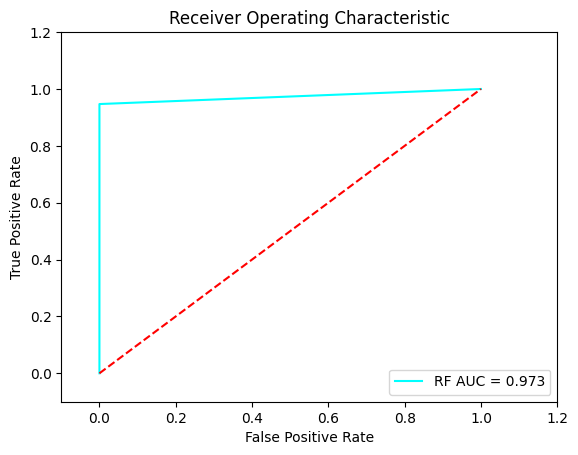

In [56]:
from sklearn.metrics import roc_curve ,auc
roc_curve_acc(y_train, y_pred, "RF")